In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('df_merged_reduced.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7088072 entries, 0 to 7088071
Data columns (total 13 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   country                          object 
 1   year                             int64  
 2   sex                              object 
 3   age                              object 
 4   Age class                        object 
 5   isced11                          object 
 6   education_level                  object 
 7   percentage_education_general     float64
 8   age_group                        object 
 9   country_birth                    object 
 10  percentage_education_by_birth    float64
 11  labour_force                     object 
 12  percentage_by_employment_status  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 703.0+ MB


In [13]:
print("Cantidad de NaNs por columna:\n", df.isnull().sum())
print("\nPorcentaje de NaNs por columna:\n", df.isnull().mean() * 100)

# Justificación:  Es crucial entender la magnitud y distribución de los valores faltantes.  
# Decisiones sobre imputación o eliminación dependerán del impacto en el análisis.  
# Por ejemplo, si 'country_birth' tiene muchos NaNs, podríamos enfocar el análisis en otros factores.

Cantidad de NaNs por columna:
 country                                  0
year                                     0
sex                                      0
age                                      0
Age class                                0
isced11                                  0
education_level                          0
percentage_education_general         22859
age_group                                0
country_birth                        49296
percentage_education_by_birth      1214275
labour_force                         98906
percentage_by_employment_status     349896
dtype: int64

Porcentaje de NaNs por columna:
 country                             0.000000
year                                0.000000
sex                                 0.000000
age                                 0.000000
Age class                           0.000000
isced11                             0.000000
education_level                     0.000000
percentage_education_general        0.322500
age

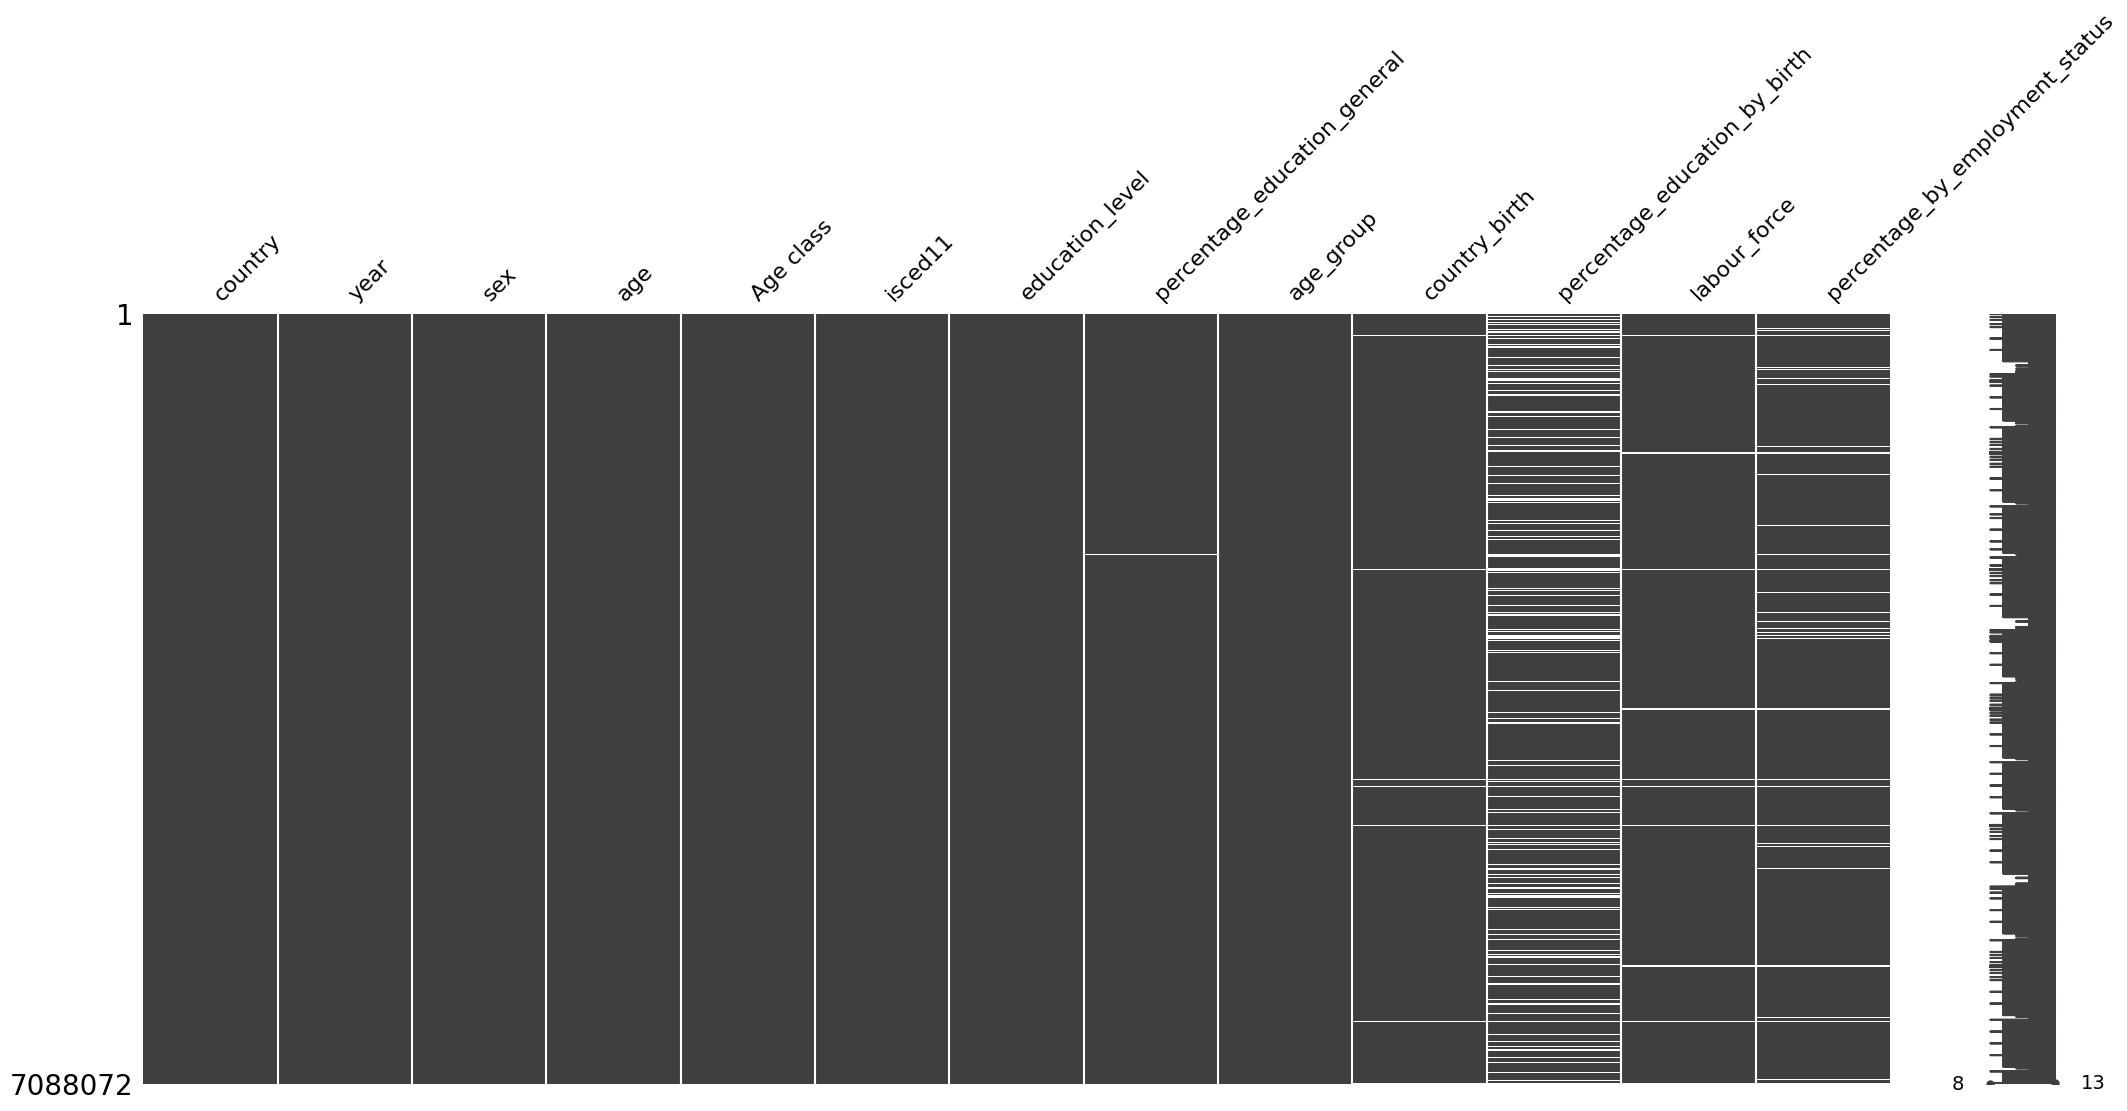

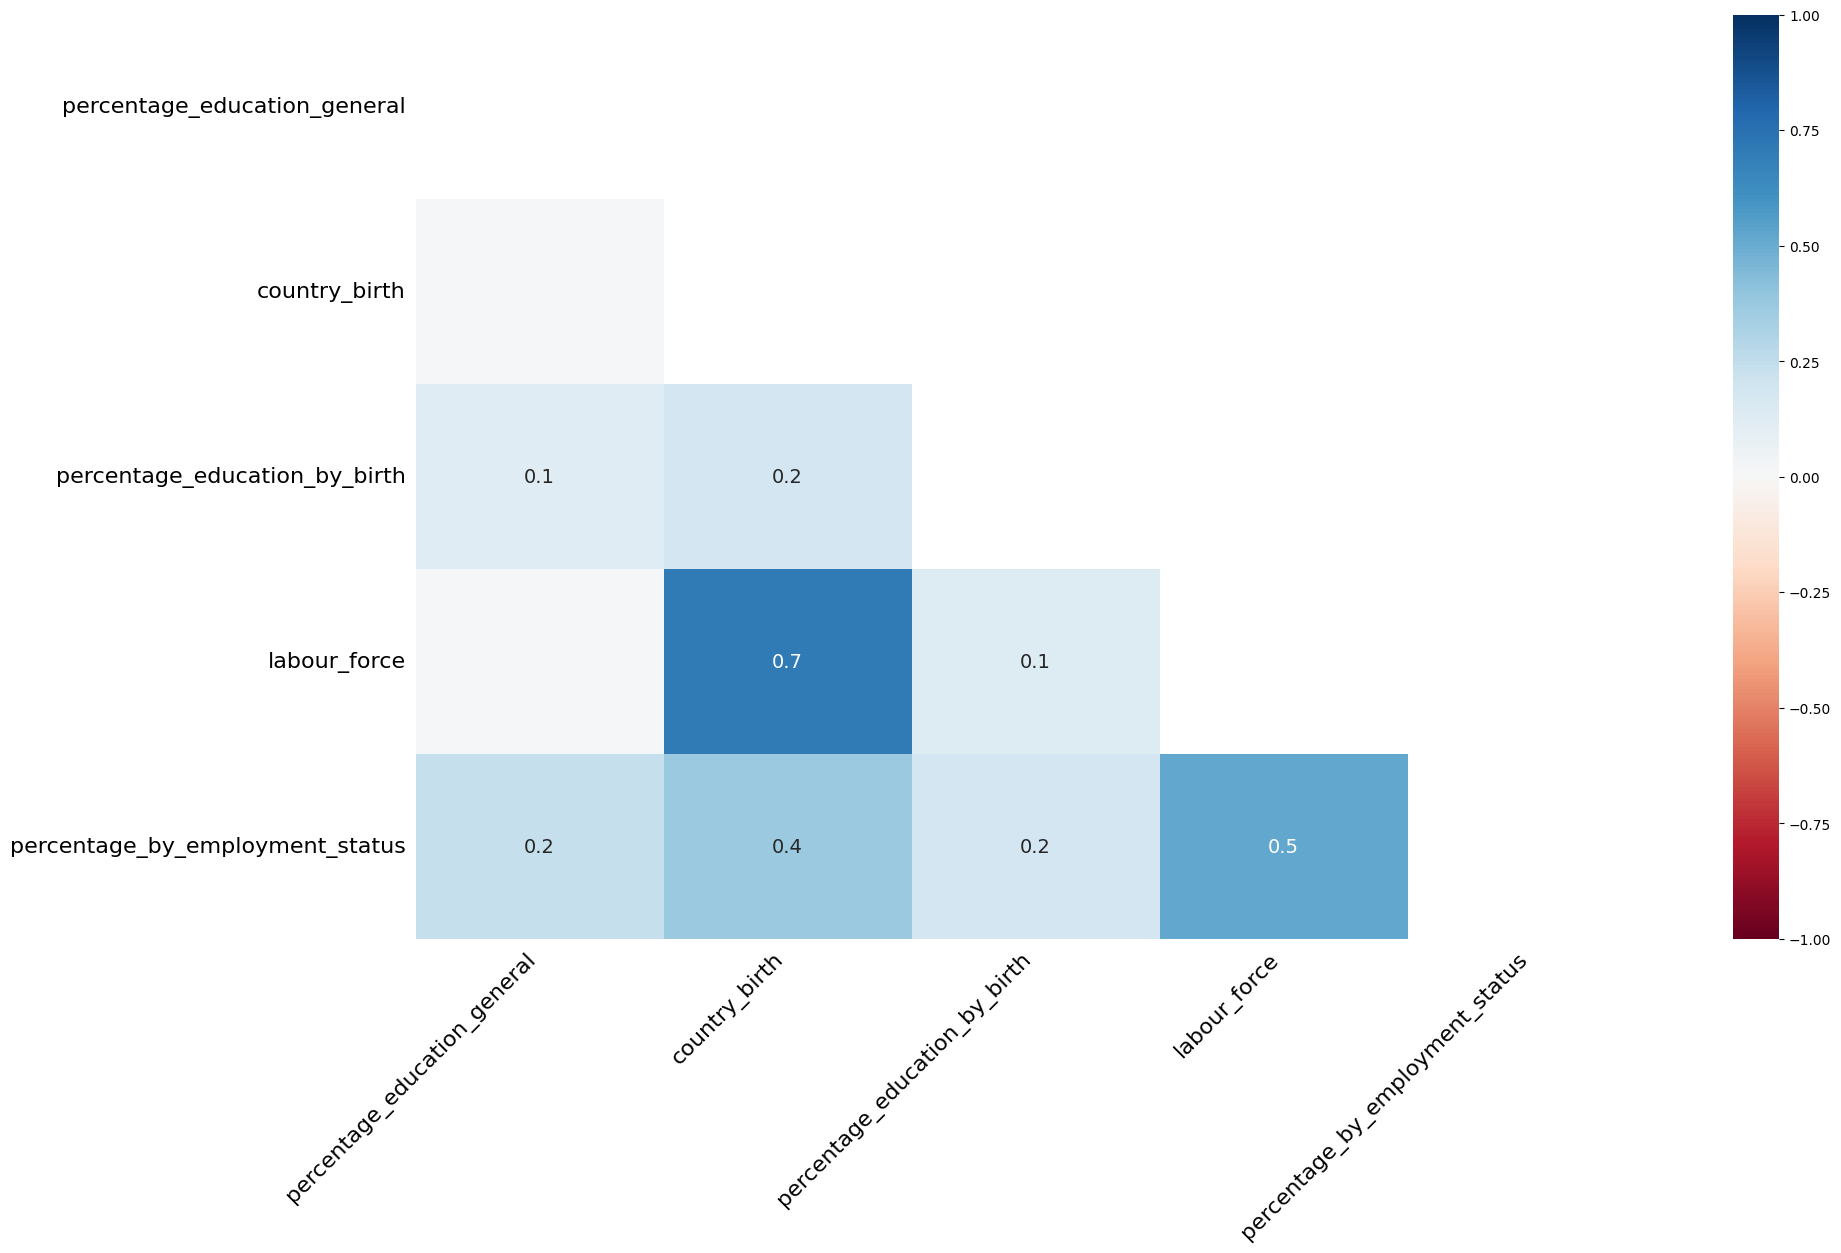

In [6]:
import missingno as msno
msno.matrix(df)
plt.show()
msno.heatmap(df)
plt.show()

#  Justificación: Entender los patrones de NaNs puede revelar sesgos en los datos y guiar decisiones sobre cómo manejarlos.

In [14]:
# Ejemplo para percentage_by_employment_status
df['percentage_by_employment_status_nan'] = np.where(df['percentage_by_employment_status'].isnull(), 1, 0)
print(df.groupby('percentage_by_employment_status_nan')['percentage_education_general'].mean())
print(df.groupby('percentage_by_employment_status_nan')['age_group'].value_counts())

# Justificación: Permite evaluar si la falta de datos está asociada con otras características del dataset.

percentage_by_employment_status_nan
0    43.420302
1    29.266843
Name: percentage_education_general, dtype: float64
percentage_by_employment_status_nan  age_group
0                                    25-54        4214047
                                     15-24        1459032
                                     15-64         356876
                                     Y25-64        355557
                                     Y30-54        352664
1                                    15-24         163580
                                     25-54          93545
                                     Y30-34         54290
                                     55-64          12966
                                     Y45-64         11346
                                     Y30-54          4966
                                     Y25-64          4869
                                     15-64           4334
Name: count, dtype: int64


In [15]:
print("\nCantidad de filas duplicadas:", df.duplicated().sum())
df = df.drop_duplicates()  # Eliminar duplicados
print("Cantidad de filas después de eliminar duplicados:", len(df))

# Justificación:  Los duplicados pueden sesgar el análisis.  
# Es importante eliminarlos, pero también investigar su origen si es posible.


Cantidad de filas duplicadas: 502548
Cantidad de filas después de eliminar duplicados: 6585524


In [16]:
print("\nAnálisis Estadístico Descriptivo:\n", df.describe())

# Justificación:  'describe()' nos da información sobre la distribución de las variables numéricas (min, max, media, desviación estándar, cuartiles).  
# Esto ayuda a identificar valores fuera de rango o distribuciones inusuales.


Análisis Estadístico Descriptivo:
                year  percentage_education_general  \
count  6.585524e+06                  6.576940e+06   
mean   2.015143e+03                  4.333162e+01   
std    5.959774e+00                  2.642170e+01   
min    1.992000e+03                  4.000000e-01   
25%    2.010000e+03                  2.050000e+01   
50%    2.016000e+03                  3.840000e+01   
75%    2.020000e+03                  6.510000e+01   
max    2.024000e+03                  9.840000e+01   

       percentage_education_by_birth  percentage_by_employment_status  \
count                   5.799972e+06                     6.349010e+06   
mean                    4.309755e+01                     4.317973e+01   
std                     2.469237e+01                     2.603469e+01   
min                     6.000000e-01                     4.000000e-01   
25%                     2.360000e+01                     2.140000e+01   
50%                     3.900000e+01            

In [17]:
for col in ['country', 'sex', 'age_group', 'education_level']:
    print(f"\nConteo de valores para {col}:\n", df[col].value_counts())

# Justificación:  Para las variables categóricas, queremos ver la distribución de las categorías.  
# Esto puede revelar categorías raras que podrían agruparse o errores de codificación.


Conteo de valores para country:
 country
European Union - 27 countries (from 2020)    218516
Euro area – 20 countries (from 2023)         217250
Netherlands                                  213729
Switzerland                                  211252
France                                       211070
Sweden                                       206180
Greece                                       203483
Denmark                                      201153
Finland                                      199208
Norway                                       197488
Belgium                                      196082
Ireland                                      194565
Luxembourg                                   192284
Portugal                                     189808
Czechia                                      188813
Spain                                        186895
Iceland                                      186761
Italy                                        185866
Austria               

In [18]:
df = df[df['sex'] != 'T']

In [19]:
df = df.drop(columns=['percentage_by_employment_status_nan'])

In [20]:
# 1. Manejo de age_group (¡¡¡Basado en la documentación de Eurostat!!!)
grupos_a_mantener = ['15-24', '25-54', '55-64', '15-64']
df = df[df['age_group'].isin(grupos_a_mantener)]

In [21]:
# 4. Acotar year
df = df[df['year'] >= 2010]

In [30]:
# Filtrar las filas que NO contienen 'general' ni 'vocacional'
df = df[~df['education_level'].str.contains('general|vocational', case=False, na=False)]

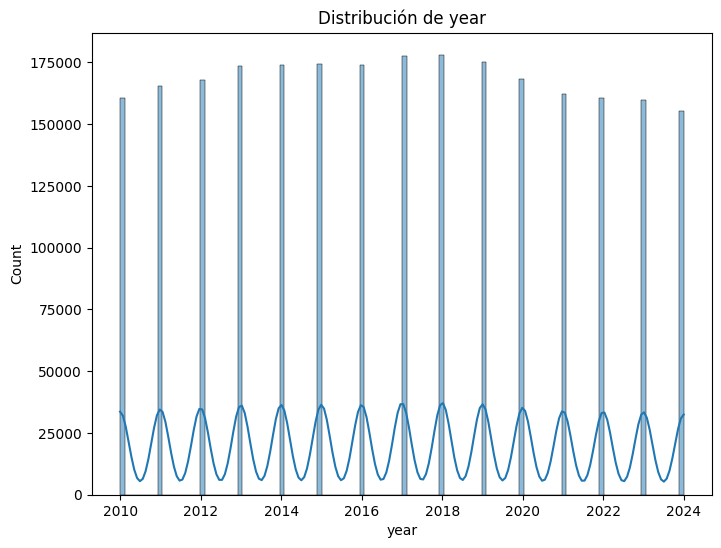

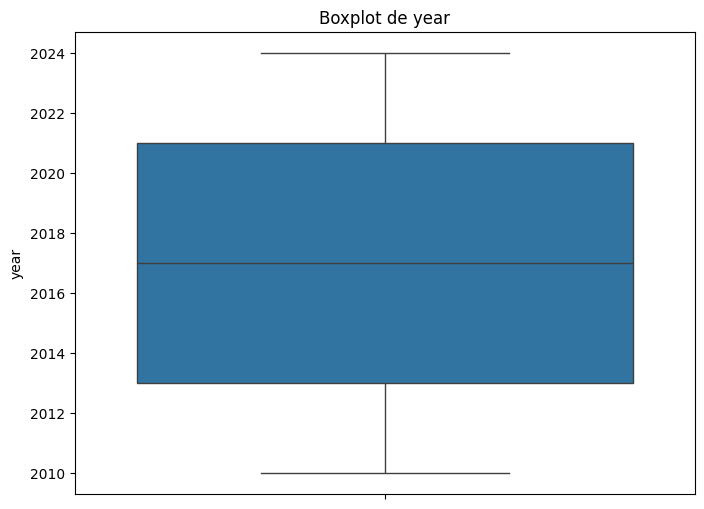

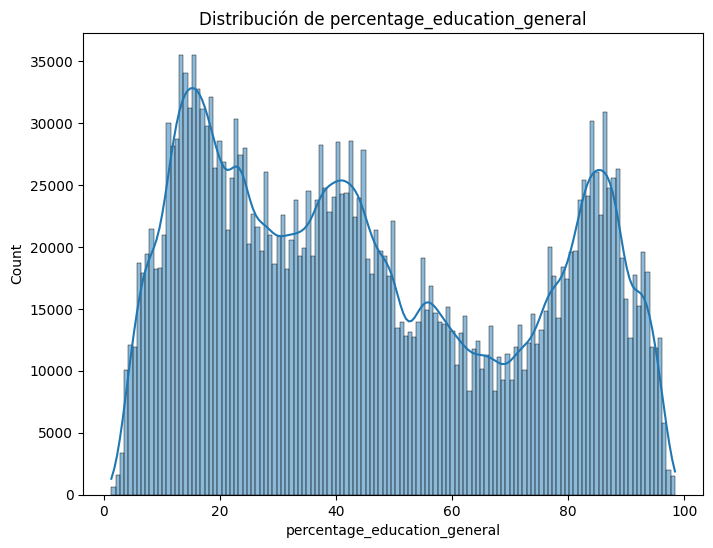

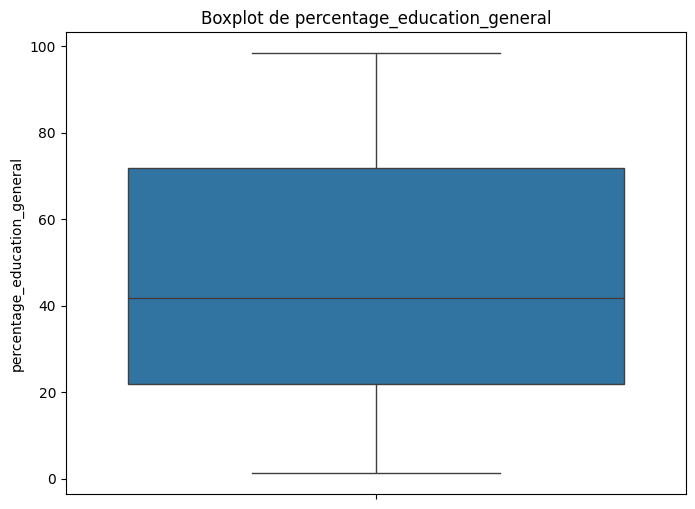

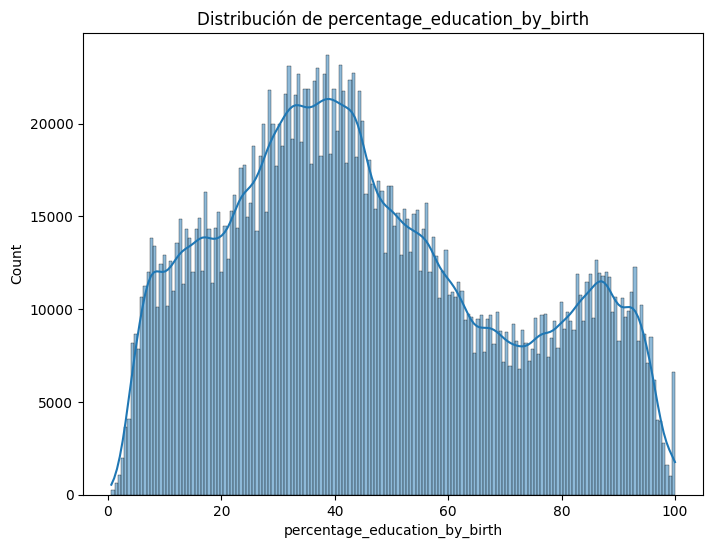

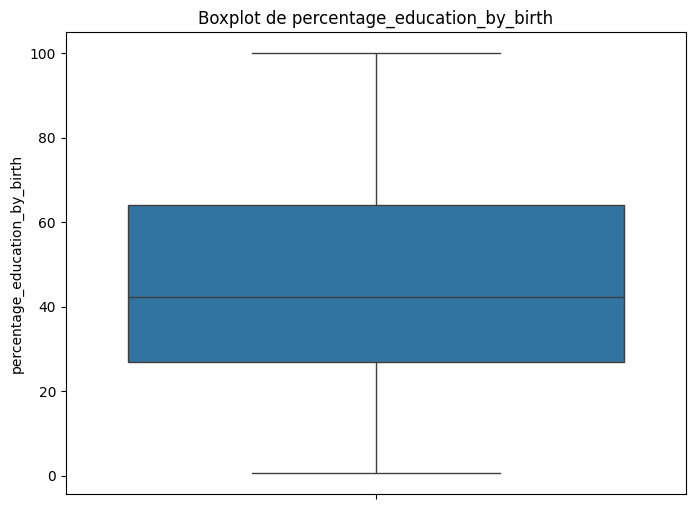

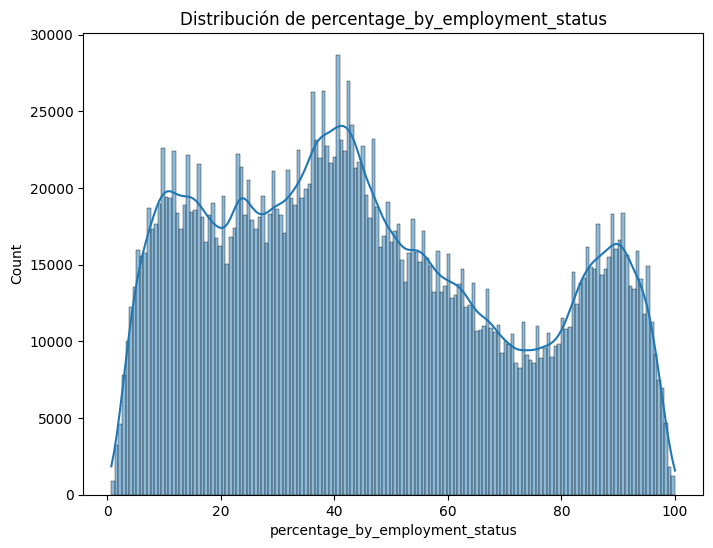

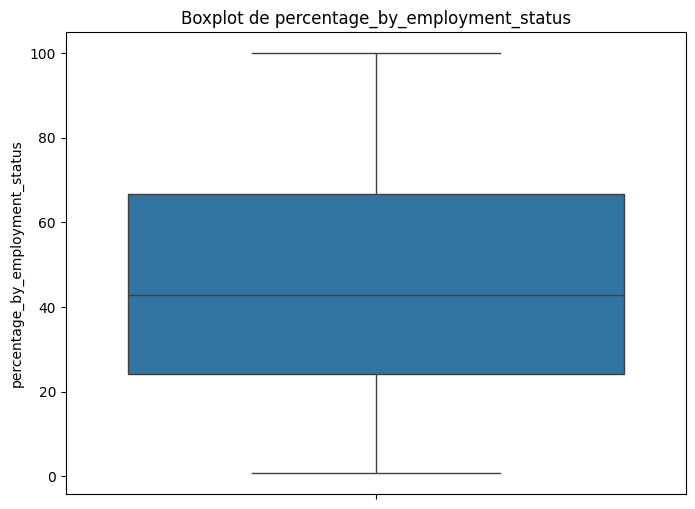

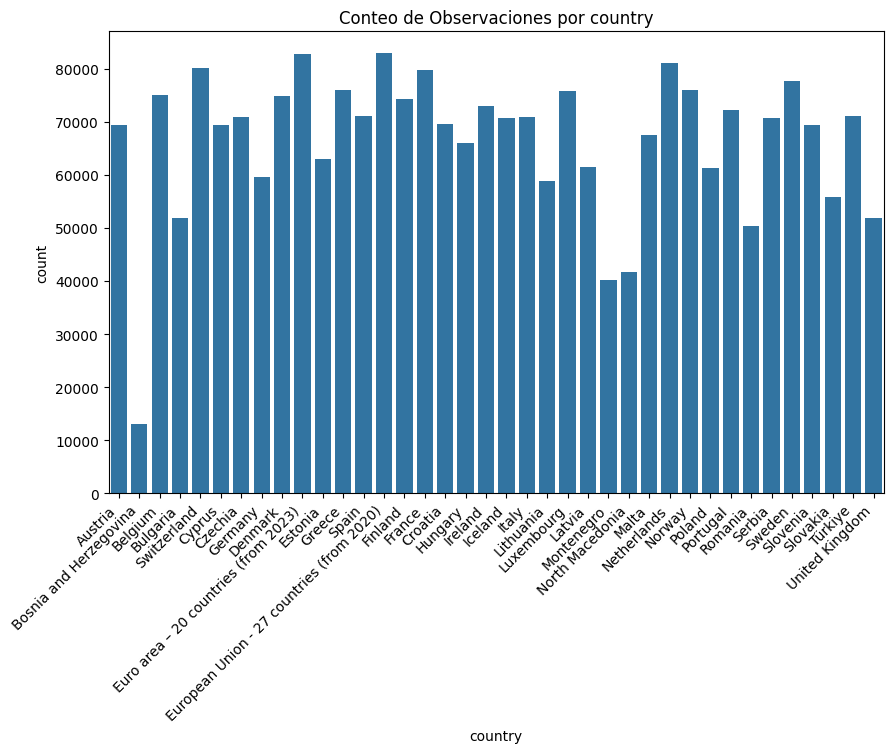

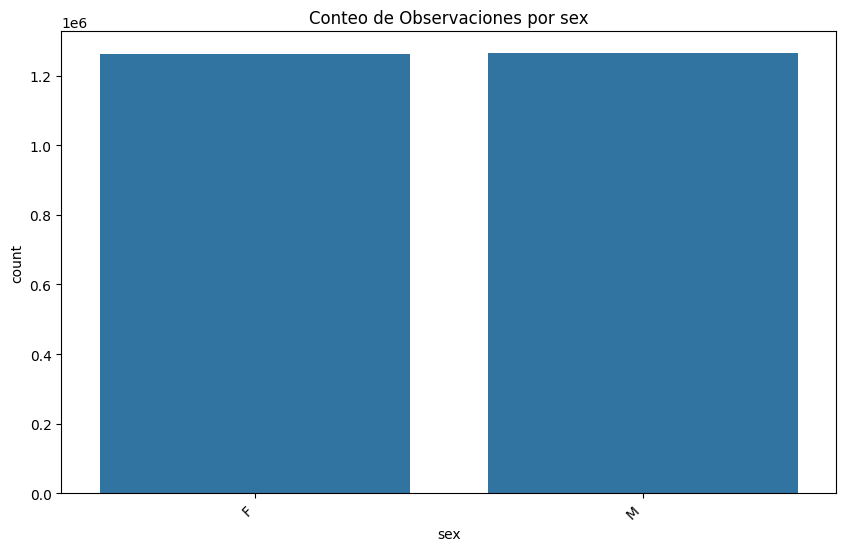

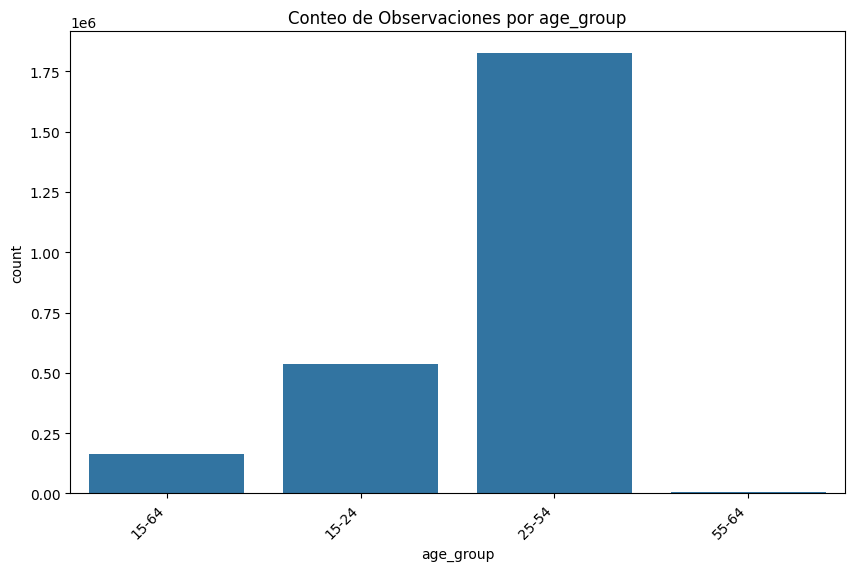

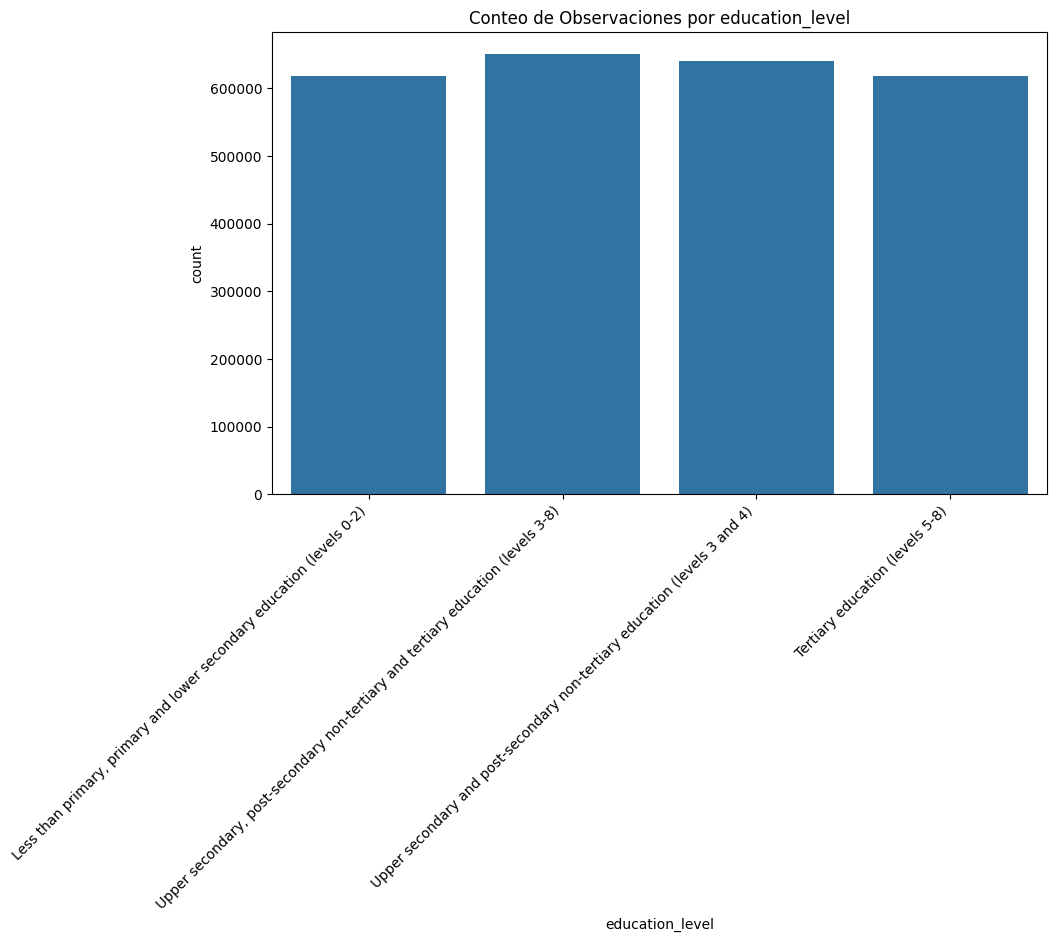


Conteo de valores para country:
 country
European Union - 27 countries (from 2020)    82869
Euro area – 20 countries (from 2023)         82826
Netherlands                                  81124
Switzerland                                  80058
France                                       79767
Sweden                                       77594
Norway                                       76064
Greece                                       75988
Luxembourg                                   75843
Belgium                                      75062
Denmark                                      74768
Finland                                      74317
Ireland                                      72996
Portugal                                     72198
Spain                                        71162
Türkiye                                      71010
Italy                                        70950
Czechia                                      70864
Serbia                                  

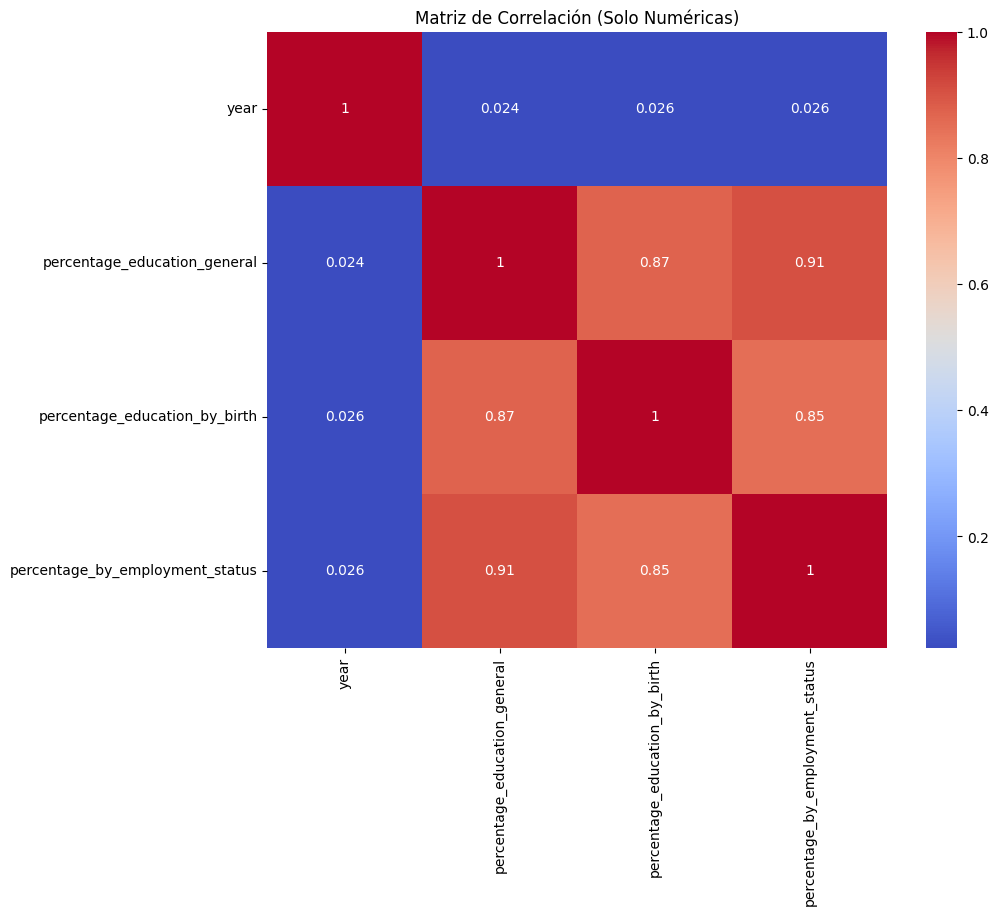

In [31]:
# 1. Análisis de Distribuciones (Completo para Variables Numéricas)

numerical_cols = ['year', 'percentage_education_general', 'percentage_education_by_birth', 'percentage_by_employment_status']

for col in numerical_cols:
    # Histograma
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

    # Boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()


# 2. Análisis de Variables Categóricas (Código ya proporcionado anteriormente)

# Gráficos de conteo para variables categóricas
categorical_cols = ['country', 'sex', 'age_group', 'education_level']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Conteo de Observaciones por {col}')
    plt.xticks(rotation=45, ha="right")  # Rotar etiquetas para mejor legibilidad
    plt.show()

# Conteo de valores únicos para variables categóricas
for col in ['country', 'sex', 'age_group', 'education_level']:
    print(f"\nConteo de valores para {col}:\n", df[col].value_counts())


# 3. Análisis de Correlación (Código ya proporcionado anteriormente y corregido)

# Matriz de correlación (solo para columnas numéricas)
numeric_df = df.select_dtypes(include=['number'])  # Seleccionar solo columnas numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación (Solo Numéricas)')
plt.show()

In [24]:
df

,country,year,sex,age,Age class,isced11,education_level,percentage_education_general,age_group,country_birth,percentage_education_by_birth,labour_force,percentage_by_employment_status
205,Austria,2010,F,Y15-64,From 15 to 64 years,ED0-2,"Less than primary, primary and lower secondary...",27.0,15-64,EU27 countries (from 2020) except reporting co...,16.6,Persons in the labour force,18.9
206,Austria,2010,F,Y15-64,From 15 to 64 years,ED0-2,"Less than primary, primary and lower secondary...",27.0,15-64,EU27 countries (from 2020) except reporting co...,16.6,Employed persons,18.2
207,Austria,2010,F,Y15-64,From 15 to 64 years,ED0-2,"Less than primary, primary and lower secondary...",27.0,15-64,EU27 countries (from 2020) except reporting co...,16.6,Persons outside the labour force,45.0
208,Austria,2010,F,Y15-64,From 15 to 64 years,ED0-2,"Less than primary, primary and lower secondary...",27.0,15-64,EU27 countries (from 2020) except reporting co...,16.6,Employed persons except employees,21.4
209,Austria,2010,F,Y15-64,From 15 to 64 years,ED0-2,"Less than primary, primary and lower secondary...",27.0,15-64,EU27 countries (from 2020) except reporting co...,16.6,Population,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4712037,United Kingdom,2015,M,Y55-64,From 55 to 64 years,ED5-8,Tertiary education (levels 5-8),34.2,55-64,NaN,NaN,NaN,NaN
4712038,United Kingdom,2016,M,Y55-64,From 55 to 64 years,ED5-8,Tertiary education (levels 5-8),34.8,55-64,NaN,NaN,NaN,NaN
4712039,United Kingdom,2017,M,Y55-64,From 55 to 64 years,ED5-8,Tertiary education (levels 5-8),34.4,55-64,NaN,NaN,NaN,NaN
4712040,United Kingdom,2018,M,Y55-64,From 55 to 64 years,ED5-8,Tertiary education (levels 5-8),33.7,55-64,NaN,NaN,NaN,NaN


In [17]:


# Filtrar las filas que NO contienen 'general' ni 'vocacional'
df = df[~df['education_level'].str.contains('general|vocational', case=False, na=False)]

# Guardar el DataFrame limpio para regresión
df = df.dropna(subset=['percentage_education_general'])
df.to_csv('data_cleaned_regression.csv', index=False)

print("Filas con 'general' o 'vocacional' en 'education_level' eliminadas.")
print("DataFrame limpio para regresión guardado en 'data_cleaned_regression.csv'")


Filas con 'general' o 'vocacional' en 'education_level' eliminadas.
DataFrame limpio para regresión guardado en 'data_cleaned_regression.csv'


In [18]:

df.to_csv('data_final_classification.csv', index=False)

In [19]:
df.describe()

,year,percentage_education_general,percentage_education_by_birth,percentage_by_employment_status
count,2.525570e+06,2.525570e+06,2.236738e+06,2.462302e+06
mean,2.016937e+03,4.613233e+01,4.613057e+01,4.619035e+01
std,4.248206e+00,2.727680e+01,2.499239e+01,2.663606e+01
min,2.010000e+03,1.300000e+00,6.000000e-01,7.000000e-01
25%,2.013000e+03,2.190000e+01,2.700000e+01,2.420000e+01
50%,2.017000e+03,4.170000e+01,4.240000e+01,4.270000e+01
75%,2.021000e+03,7.190000e+01,6.400000e+01,6.670000e+01
max,2.024000e+03,9.840000e+01,1.000000e+02,1.000000e+02


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2525570 entries, 205 to 4712041
Data columns (total 13 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   country                          object 
 1   year                             int64  
 2   sex                              object 
 3   age                              object 
 4   Age class                        object 
 5   isced11                          object 
 6   education_level                  object 
 7   percentage_education_general     float64
 8   age_group                        object 
 9   country_birth                    object 
 10  percentage_education_by_birth    float64
 11  labour_force                     object 
 12  percentage_by_employment_status  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 269.8+ MB


In [21]:
df.head(1)

,country,year,sex,age,Age class,isced11,education_level,percentage_education_general,age_group,country_birth,percentage_education_by_birth,labour_force,percentage_by_employment_status
205,Austria,2010,F,Y15-64,From 15 to 64 years,ED0-2,"Less than primary, primary and lower secondary...",27.0,15-64,EU27 countries (from 2020) except reporting co...,16.6,Persons in the labour force,18.9


In [2]:
# Calcular el tamaño de la muestra por grupo estratificado
def stratified_sample(df, strata, size=None, seed=None, frac=None):
    if frac is not None:
        size = round(len(df) * frac)
    elif size is None:
        size = len(df)

    if seed is not None:
        df = df.sample(frac=1, random_state=seed)
    else:
        df = df.sample(frac=1)

    grouped = df.groupby(strata)
    sample = grouped.apply(lambda x: x.sample(min(len(x), round(len(x)*frac) if frac is not None else size//grouped.ngroups)))
    sample.index = sample.index.droplevel(0)
    return sample

In [22]:
# Especificar el tamaño de la muestra (5% = 0.05)
sample_fraction = 0.05


# Realizar el muestreo estratificado
stratified_df = stratified_sample(df, strata=['country', 'education_level', 'sex'], frac=sample_fraction, seed=42)

# Especificar el nombre del nuevo archivo CSV para la muestra estratificada
output_csv_file_stratified = 'data_sample_stratified_for_flourish.csv'

# Guardar el DataFrame muestreado estratificado en un nuevo archivo CSV
stratified_df.to_csv(output_csv_file_stratified, index=False)

print(f"Se ha guardado una muestra estratificada del {sample_fraction*100}% del dataset en '{output_csv_file_stratified}'")
print(f"Tamaño del dataset original: {len(df)}")
print(f"Tamaño del dataset muestreado estratificado: {len(stratified_df)}")

C:\Users\Ivan\AppData\Local\Temp\ipykernel_63640\4053428127.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample = grouped.apply(lambda x: x.sample(min(len(x), round(len(x)*frac) if frac is not None else size//grouped.ngroups)))


Se ha guardado una muestra estratificada del 5.0% del dataset en 'data_sample_stratified_for_flourish.csv'
Tamaño del dataset original: 2525570
Tamaño del dataset muestreado estratificado: 126271


# DESDE AQUÍ

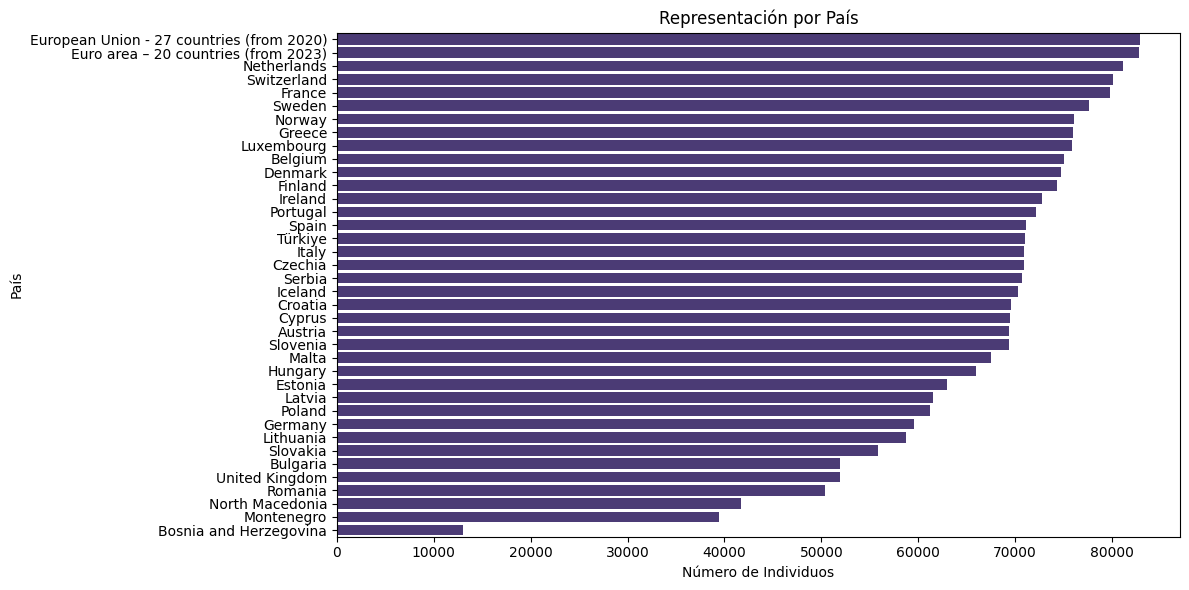

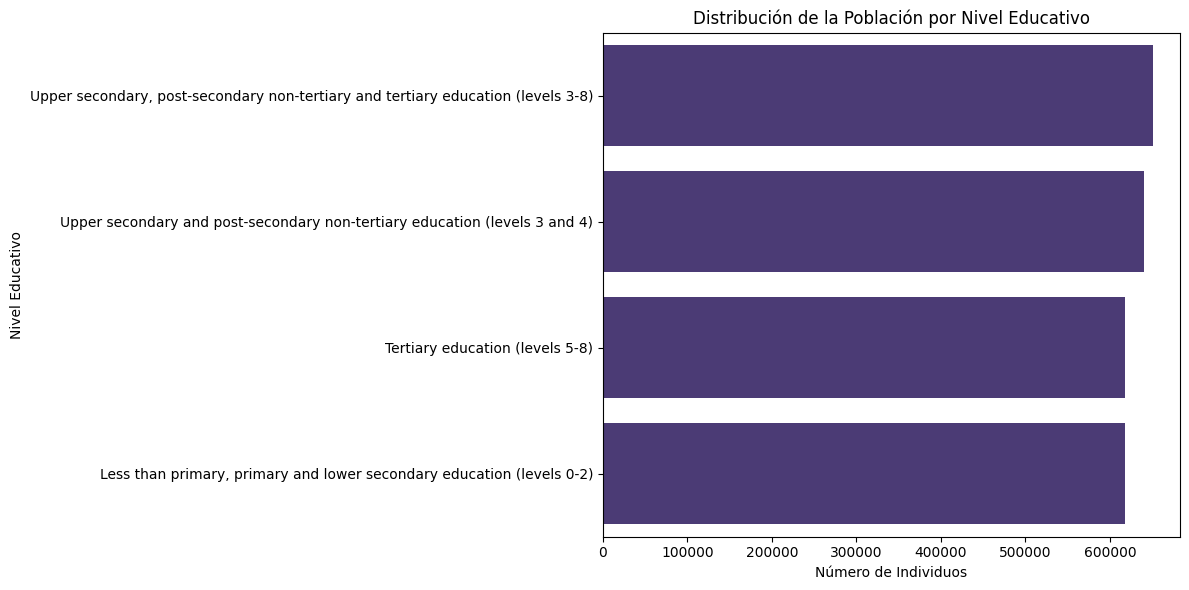

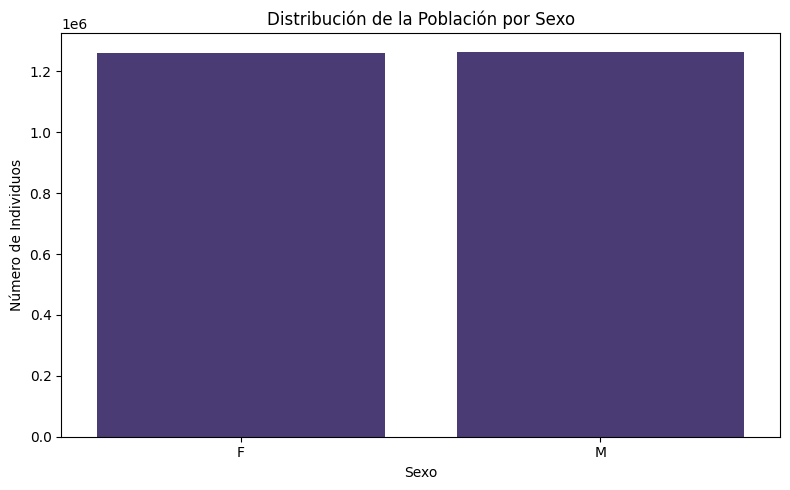

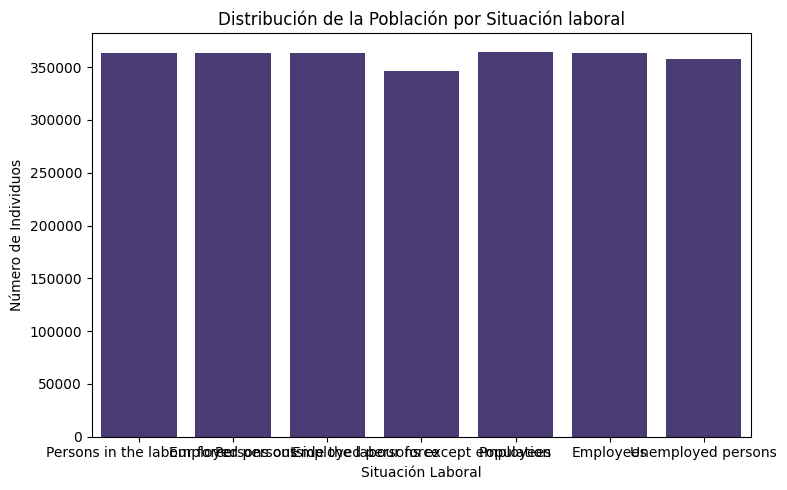

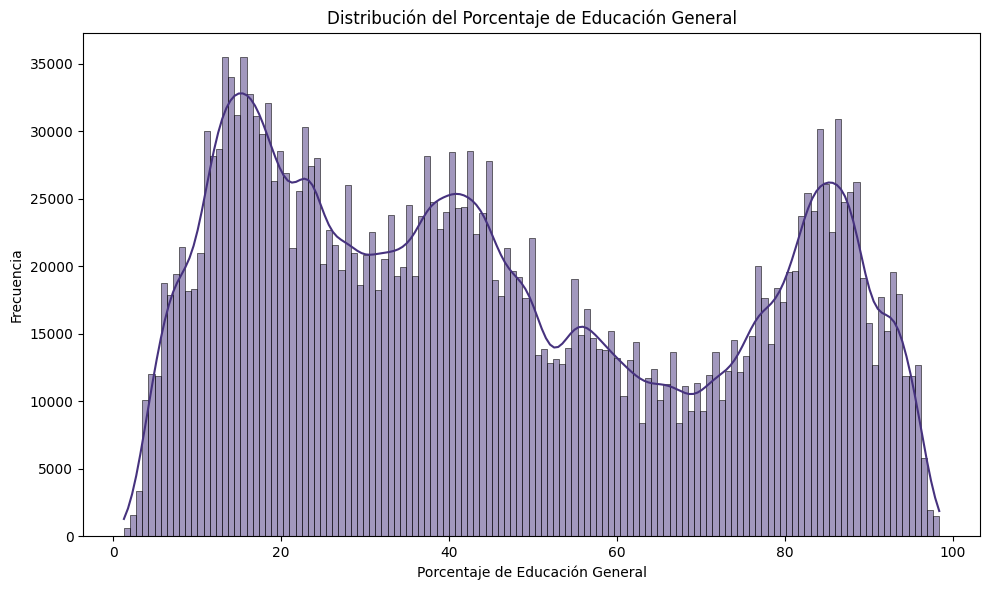

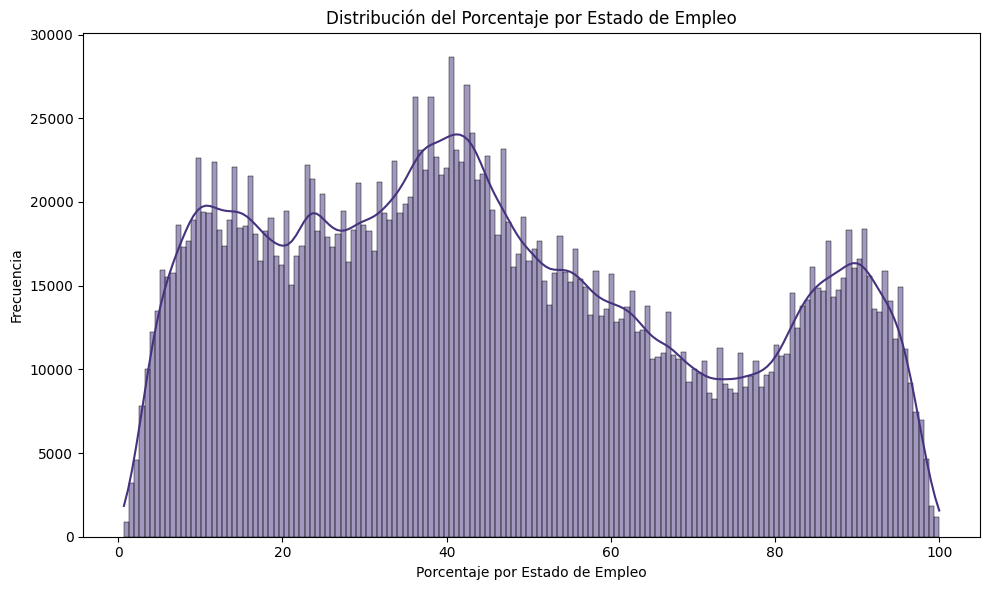

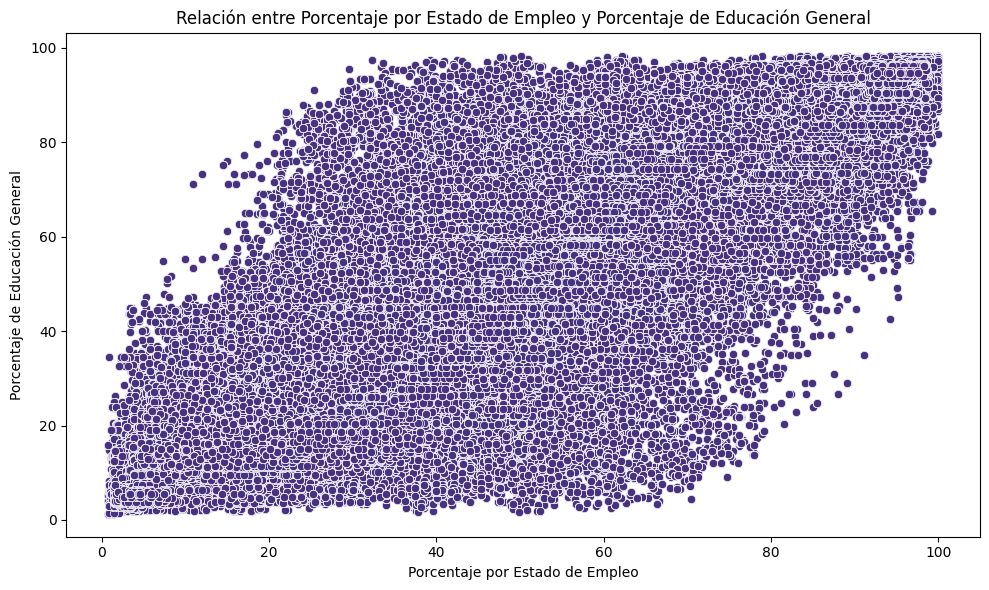

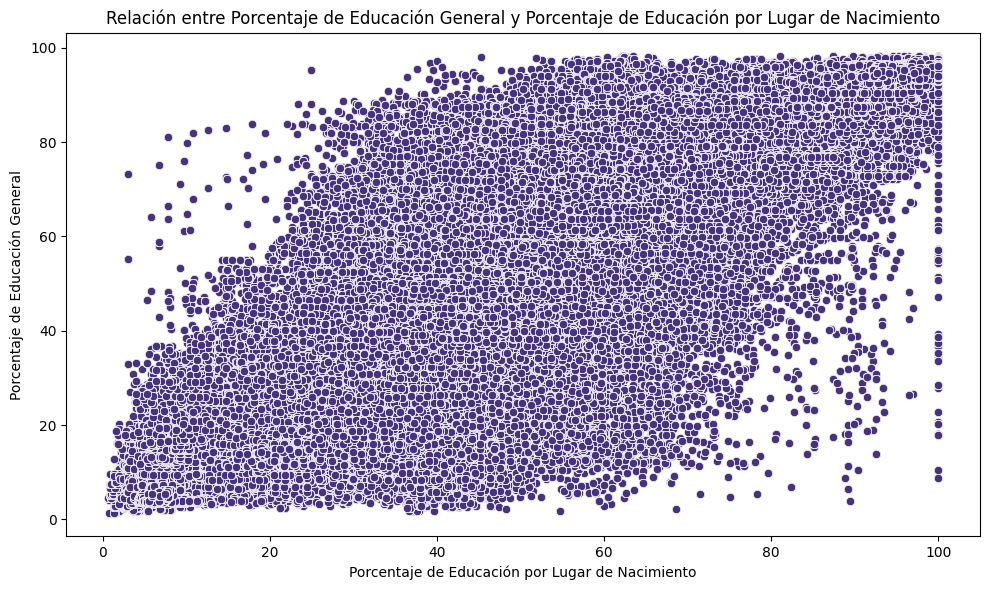

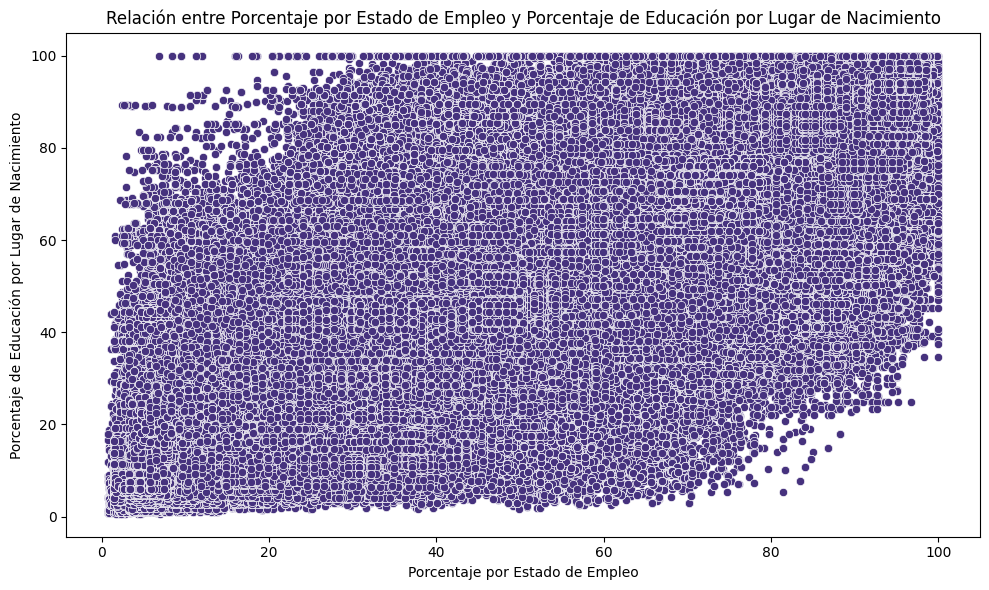

C:\Users\Ivan\AppData\Local\Temp\ipykernel_63640\1028918608.py:92: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Ivan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


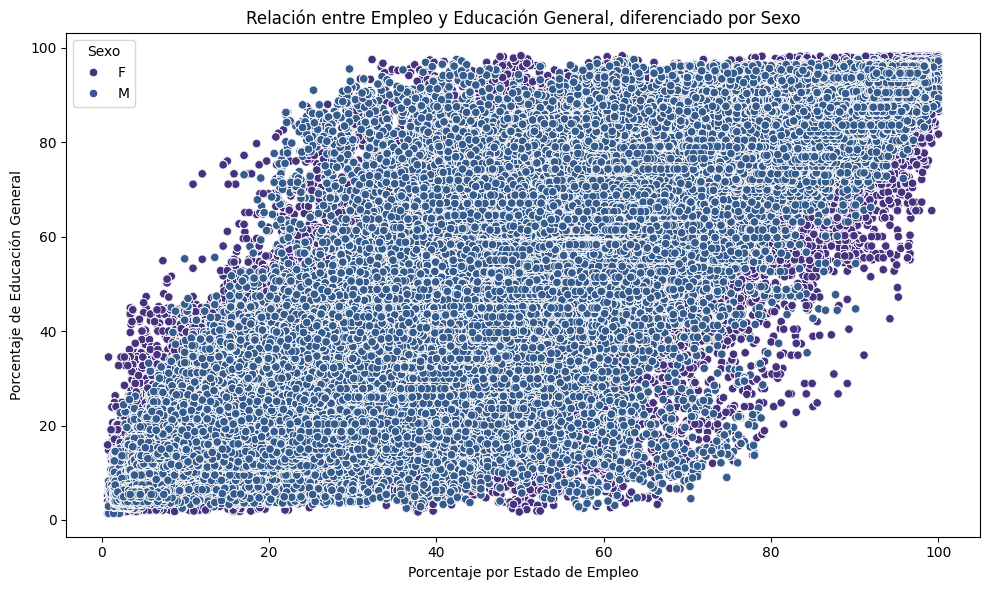

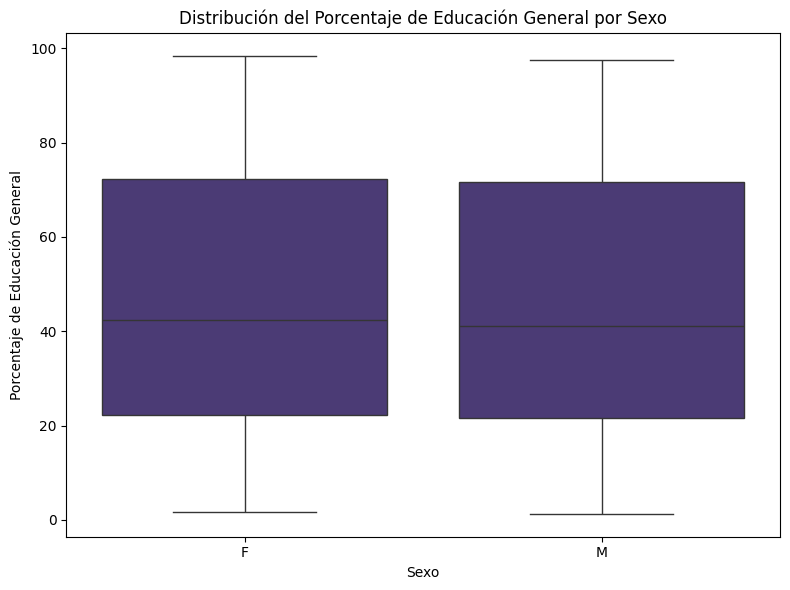

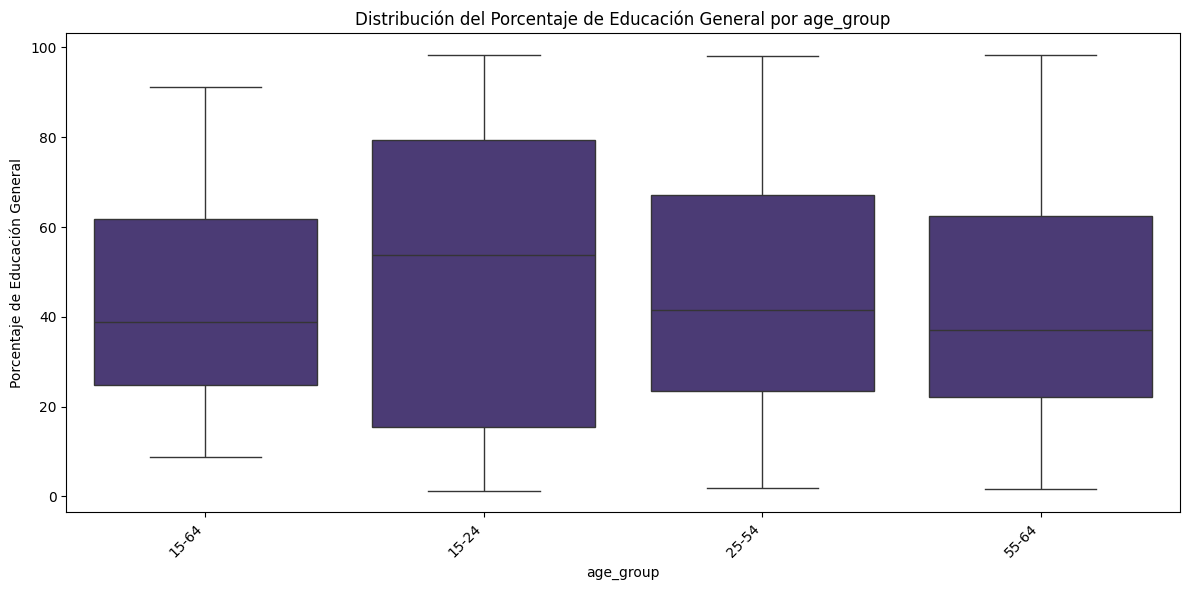

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer la paleta de colores azul-verde
sns.set_palette("viridis")

# Cargar tu DataFrame
df = pd.read_csv('data_final_classification.csv')

# 1. Distribución de Variables Categóricas Clave
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='country', order=df['country'].value_counts().index)
plt.title('Representación por País')
plt.xlabel('Número de Individuos')
plt.ylabel('País')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='education_level', order=df['education_level'].value_counts().index)
plt.title('Distribución de la Población por Nivel Educativo')
plt.xlabel('Número de Individuos')
plt.ylabel('Nivel Educativo')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sex')
plt.title('Distribución de la Población por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Individuos')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='labour_force')
plt.title('Distribución de la Población por Situación laboral')
plt.xlabel('Situación Laboral')
plt.ylabel('Número de Individuos')
plt.tight_layout()
plt.show()

# 2. Distribución de Variables Numéricas Clave
plt.figure(figsize=(10, 6))
sns.histplot(df['percentage_education_general'], kde=True)
plt.title('Distribución del Porcentaje de Educación General')
plt.xlabel('Porcentaje de Educación General')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['percentage_by_employment_status'], kde=True)
plt.title('Distribución del Porcentaje por Estado de Empleo')
plt.xlabel('Porcentaje por Estado de Empleo')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# 3. Relación entre Variables Numéricas (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='percentage_by_employment_status', y='percentage_education_general')
plt.title('Relación entre Porcentaje por Estado de Empleo y Porcentaje de Educación General')
plt.xlabel('Porcentaje por Estado de Empleo')
plt.ylabel('Porcentaje de Educación General')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='percentage_education_by_birth', y='percentage_education_general')
plt.title('Relación entre Porcentaje de Educación General y Porcentaje de Educación por Lugar de Nacimiento')
plt.xlabel('Porcentaje de Educación por Lugar de Nacimiento')
plt.ylabel('Porcentaje de Educación General')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='percentage_by_employment_status', y='percentage_education_by_birth')
plt.title('Relación entre Porcentaje por Estado de Empleo y Porcentaje de Educación por Lugar de Nacimiento')
plt.xlabel('Porcentaje por Estado de Empleo')
plt.ylabel('Porcentaje de Educación por Lugar de Nacimiento')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='percentage_by_employment_status', y='percentage_education_general', hue='sex')
plt.title('Relación entre Empleo y Educación General, diferenciado por Sexo')
plt.xlabel('Porcentaje por Estado de Empleo')
plt.ylabel('Porcentaje de Educación General')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

# 4. Relación entre Variable Categórica y Numérica (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sex', y='percentage_education_general')
plt.title('Distribución del Porcentaje de Educación General por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Porcentaje de Educación General')
plt.tight_layout()
plt.show()

age_col = 'age_group' if 'age_group' in df.columns else 'Age class'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x=age_col, y='percentage_education_general')
plt.title(f'Distribución del Porcentaje de Educación General por {age_col}')
plt.xlabel(age_col)
plt.ylabel('Porcentaje de Educación General')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

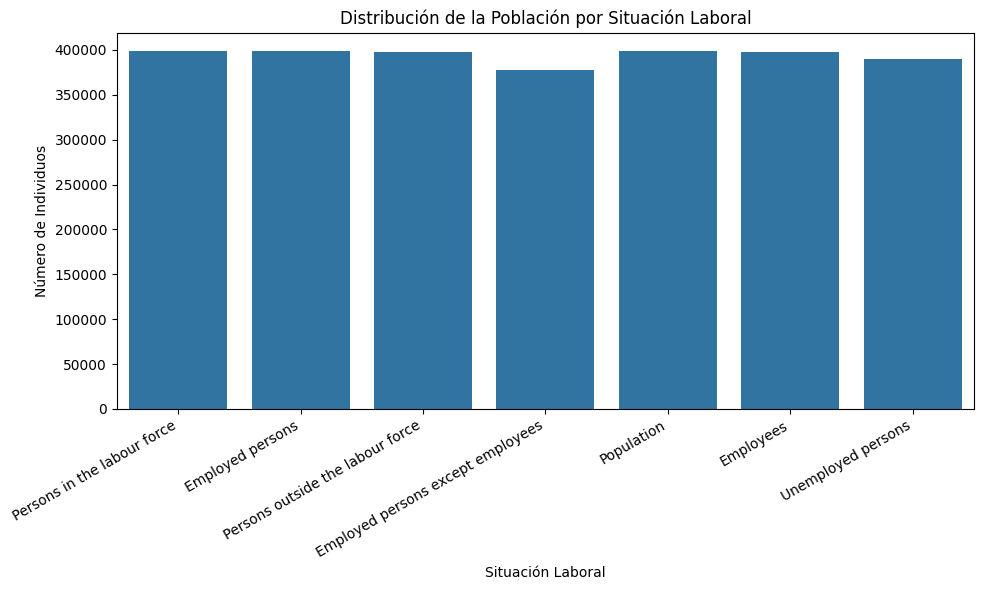

In [25]:
plt.figure(figsize=(10, 6))  # Aumenta el tamaño para más espacio
sns.countplot(data=df, x='labour_force')
plt.title('Distribución de la Población por Situación Laboral')
plt.xlabel('Situación Laboral')
plt.ylabel('Número de Individuos')
plt.xticks(rotation=30, ha='right')  # Rotar las etiquetas 45 grados y alinear a la derecha
plt.tight_layout()
plt.show()

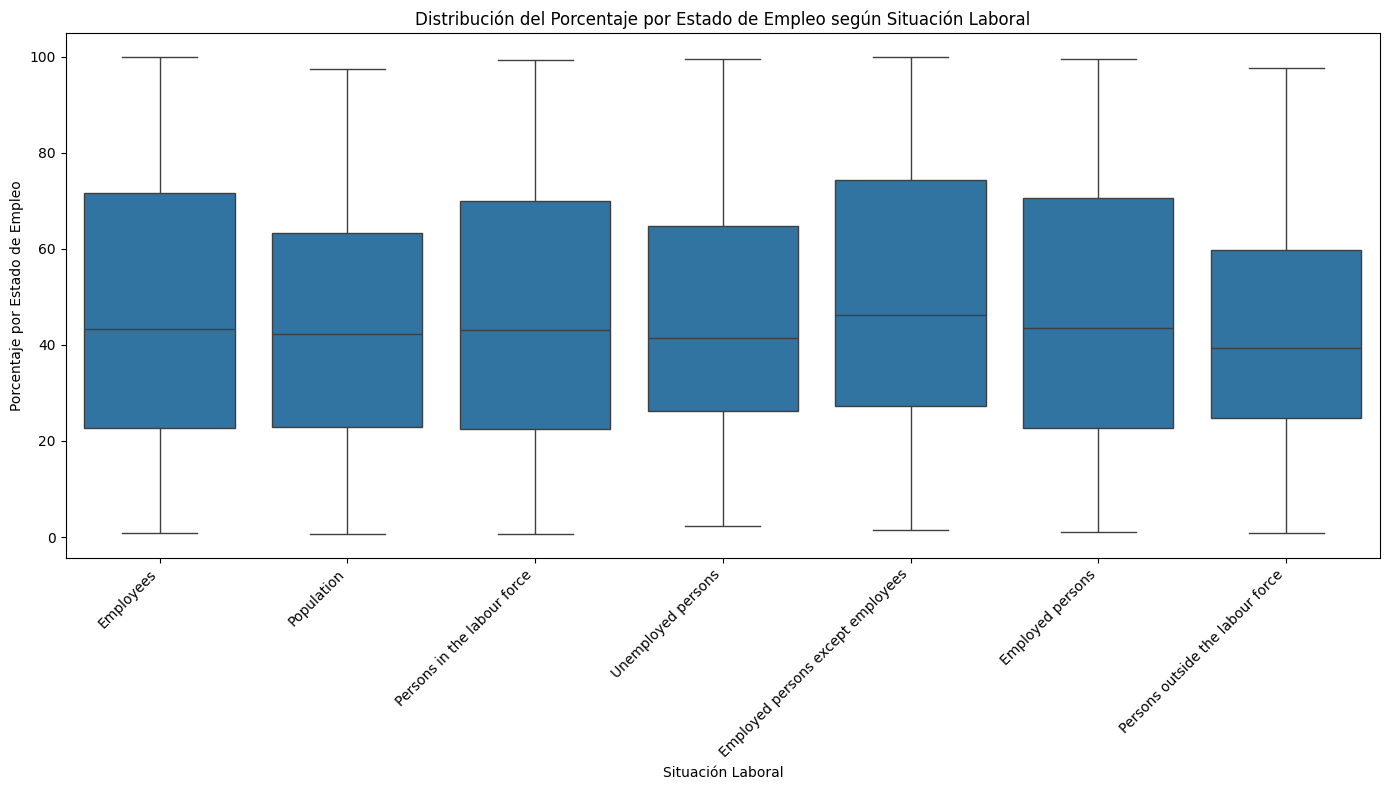

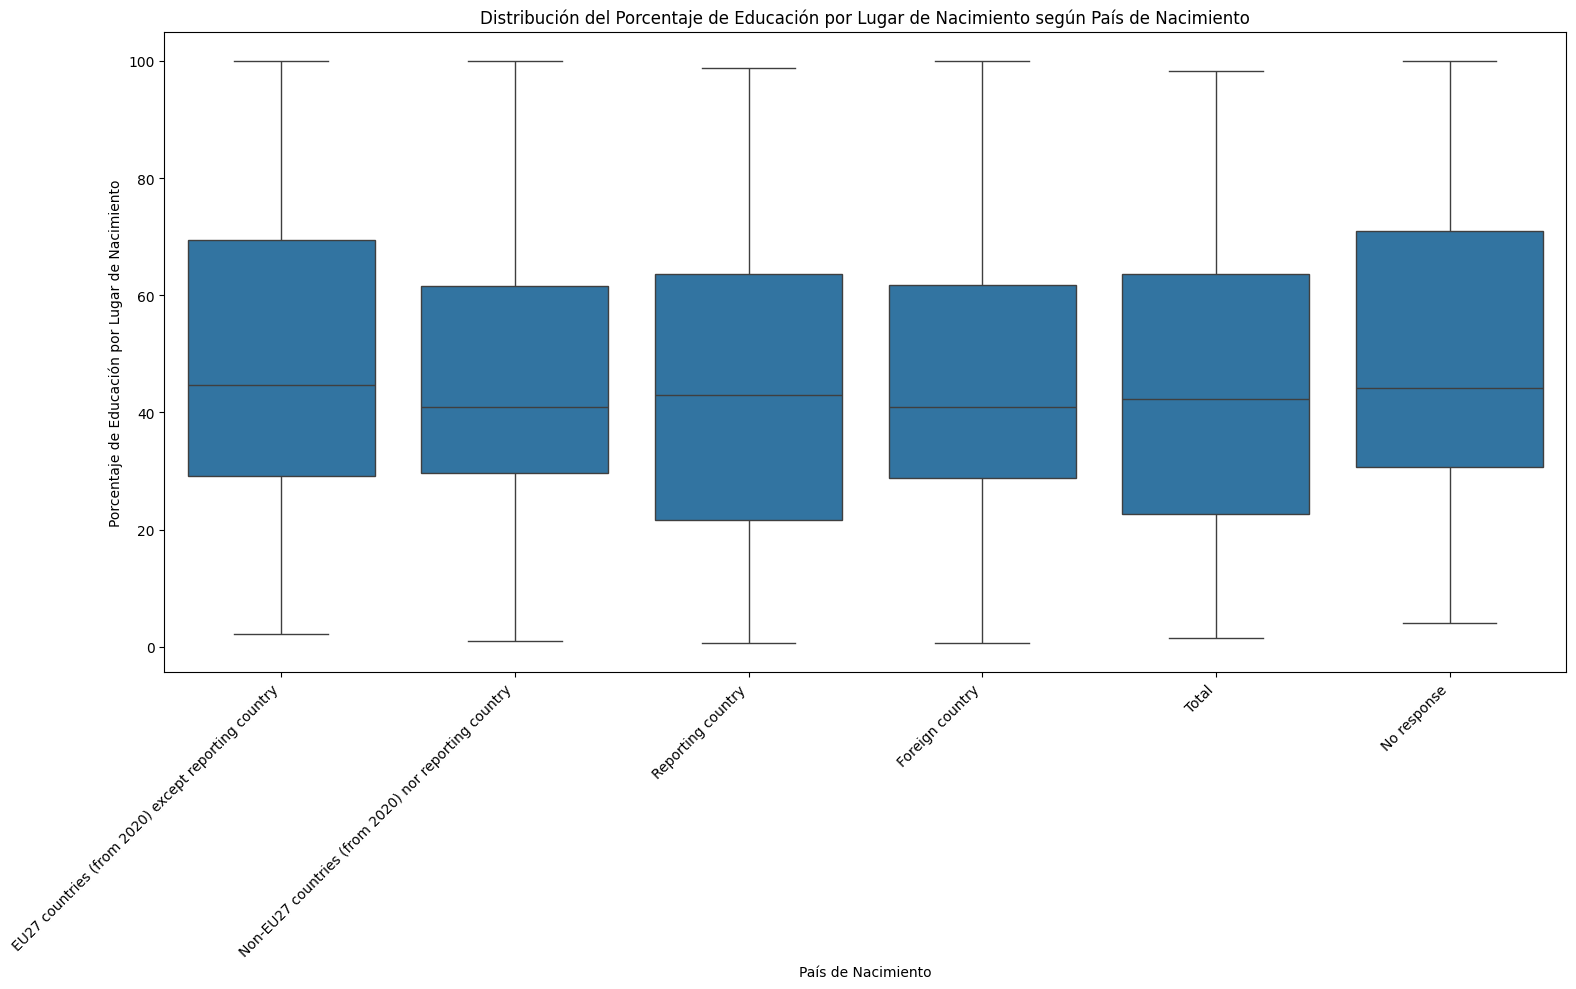

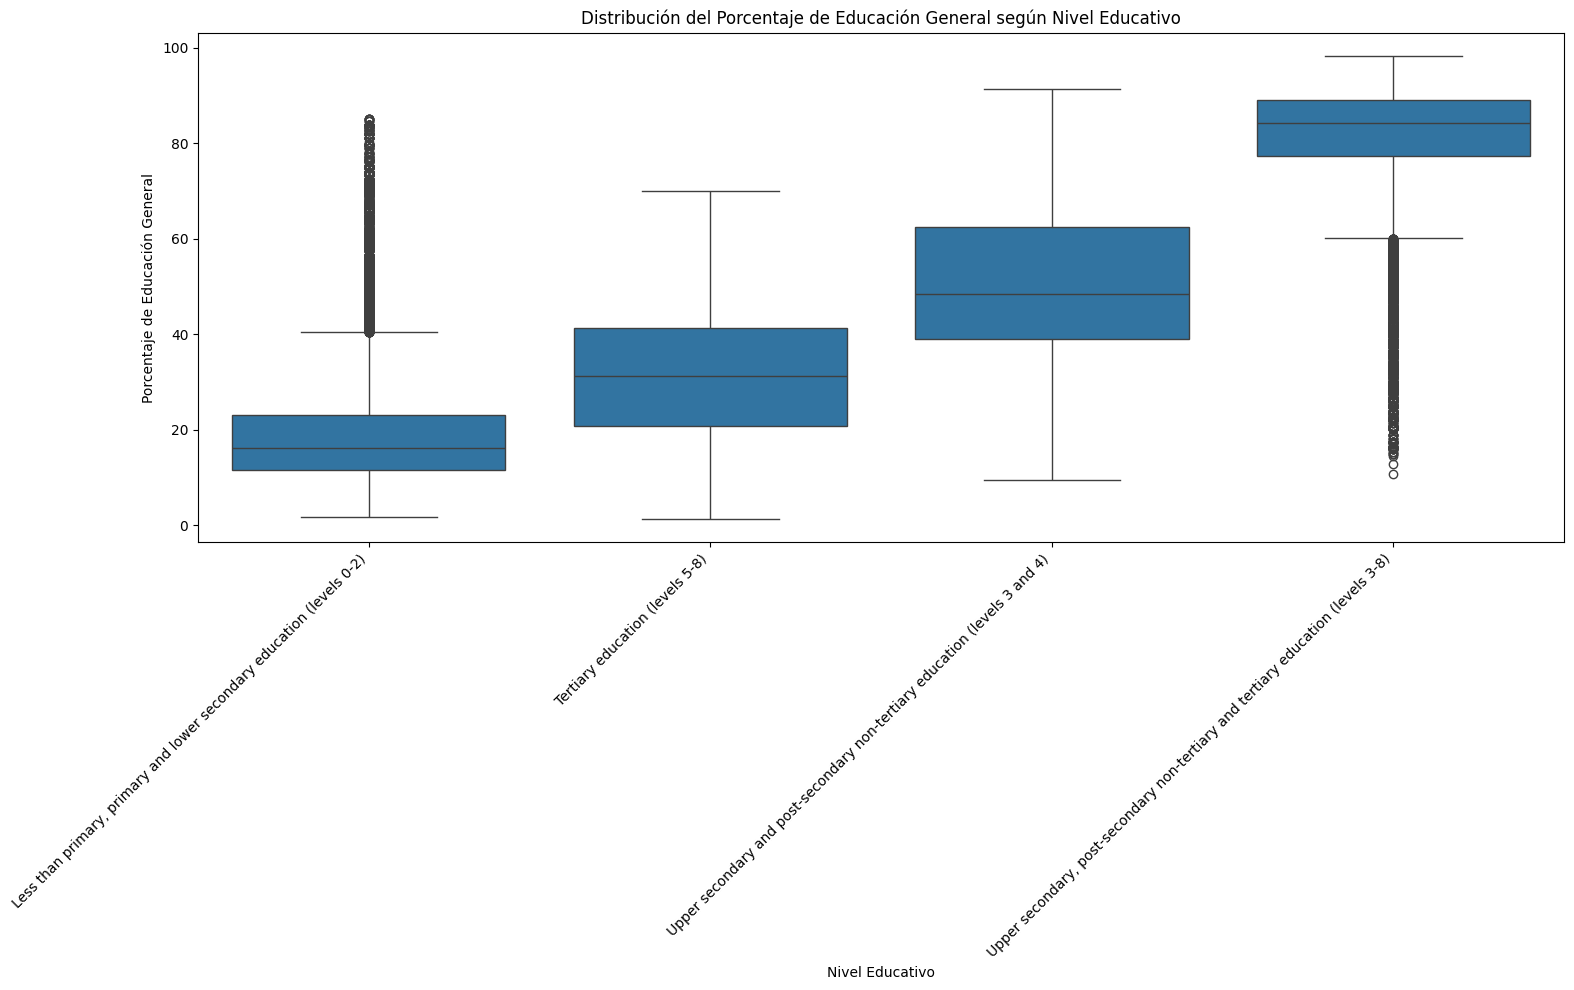

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame estratificado
stratified_df = pd.read_csv('data_sample_stratified_for_flourish.csv')

# 1. 'percentage_by_employment_status' vs 'labour_force'
plt.figure(figsize=(14, 8))
sns.boxplot(data=stratified_df, x='labour_force', y='percentage_by_employment_status')
plt.title('Distribución del Porcentaje por Estado de Empleo según Situación Laboral')
plt.xlabel('Situación Laboral')
plt.ylabel('Porcentaje por Estado de Empleo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. 'percentage_education_by_birth' vs 'country_birth'
plt.figure(figsize=(16, 10))
sns.boxplot(data=stratified_df, x='country_birth', y='percentage_education_by_birth')
plt.title('Distribución del Porcentaje de Educación por Lugar de Nacimiento según País de Nacimiento')
plt.xlabel('País de Nacimiento')
plt.ylabel('Porcentaje de Educación por Lugar de Nacimiento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. 'percentage_education_general' vs 'education_level'
plt.figure(figsize=(16, 10))
sns.boxplot(data=stratified_df, x='education_level', y='percentage_education_general')
plt.title('Distribución del Porcentaje de Educación General según Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Porcentaje de Educación General')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

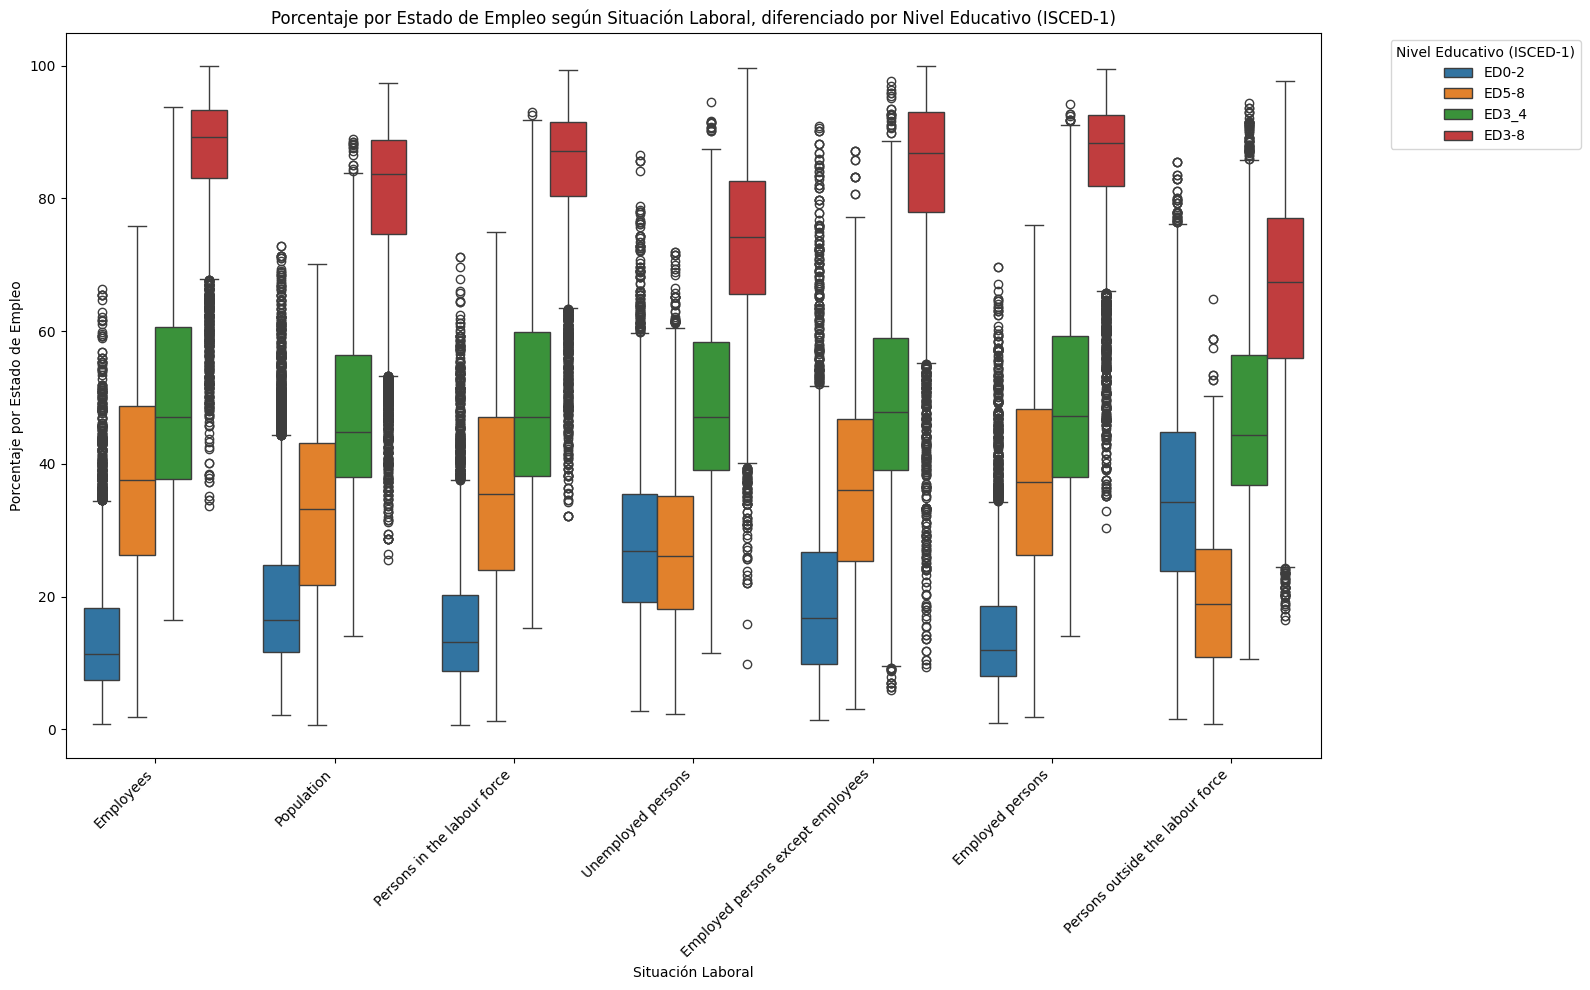

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame estratificado
stratified_df = pd.read_csv('data_sample_stratified_for_flourish.csv')

plt.figure(figsize=(16, 10))
sns.boxplot(data=stratified_df, x='labour_force', y='percentage_by_employment_status', hue='isced11')
plt.title('Porcentaje por Estado de Empleo según Situación Laboral, diferenciado por Nivel Educativo (ISCED-1)')
plt.xlabel('Situación Laboral')
plt.ylabel('Porcentaje por Estado de Empleo')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Nivel Educativo (ISCED-1)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame estratificado
stratified_df = pd.read_csv('data_sample_stratified_for_flourish.csv')

plt.figure(figsize=(16, 10))
sns.boxplot(data=stratified_df, x='labour_force', y='percentage_by_employment_status', hue='isced1')
plt.title('Porcentaje por Estado de Empleo según Situación Laboral, diferenciado por Nivel Educativo (ISCED-1)')
plt.xlabel('Situación Laboral')
plt.ylabel('Porcentaje por Estado de Empleo')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Nivel Educativo (ISCED-1)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

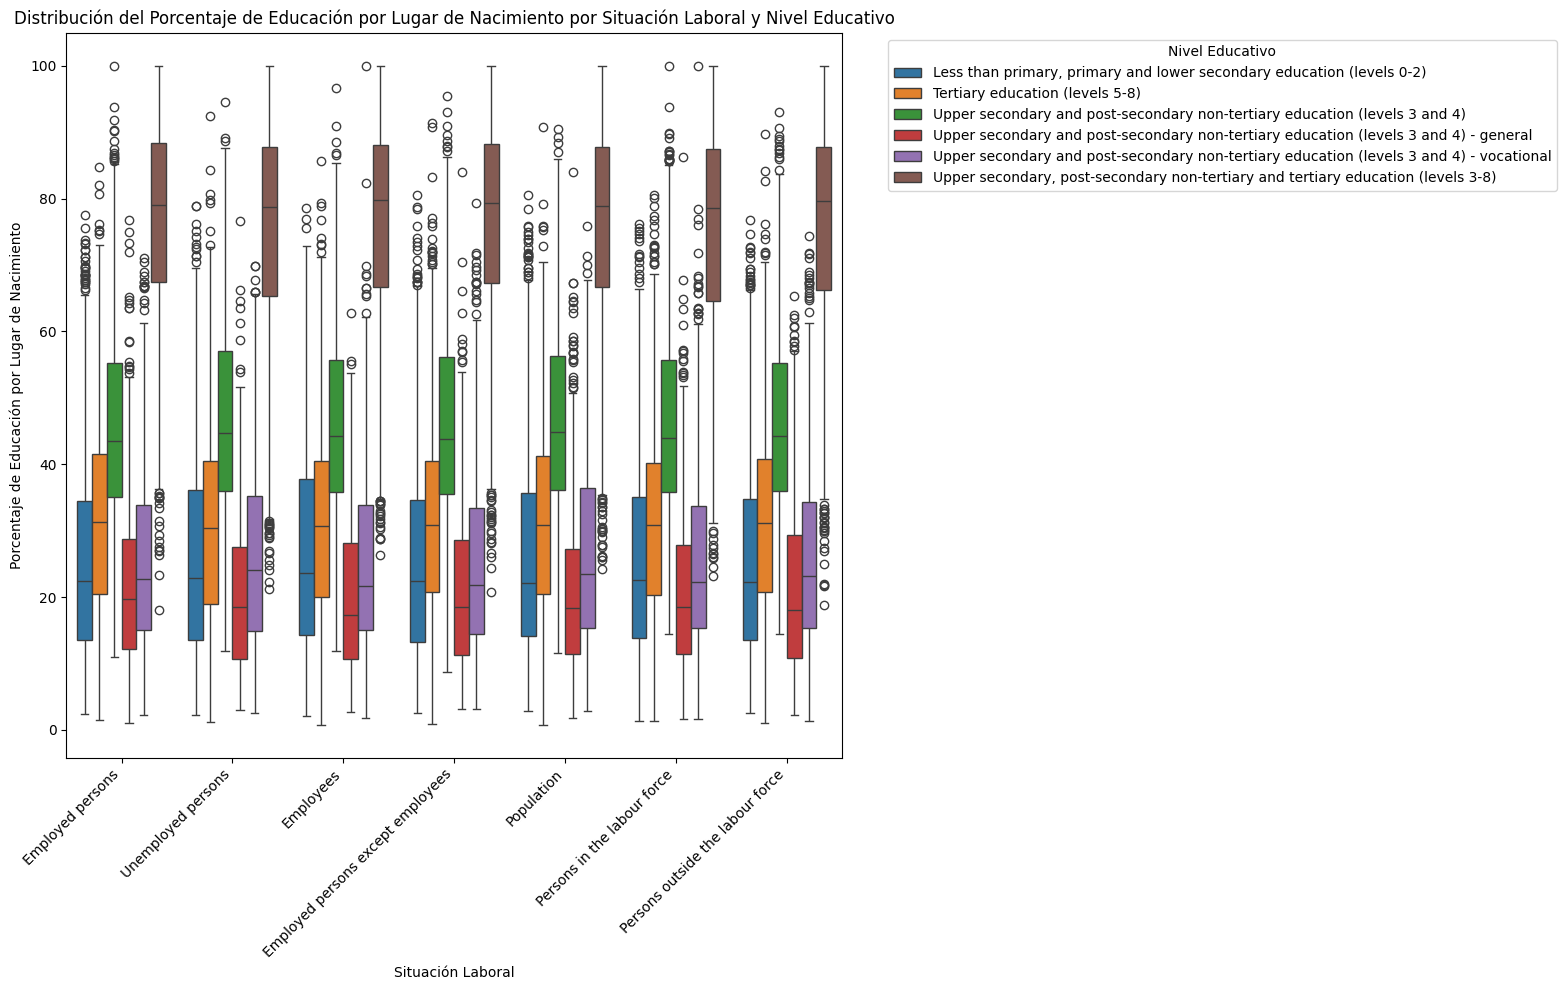

In [7]:
# Ajustar el tamaño de la figura para mayor claridad
plt.figure(figsize=(16, 10))

# Crear los box plots
sns.boxplot(data=stratified_df2, x='labour_force', y='percentage_education_by_birth', hue='education_level')

# Añadir título y etiquetas
plt.title('Distribución del Porcentaje de Educación por Lugar de Nacimiento por Situación Laboral y Nivel Educativo')
plt.xlabel('Situación Laboral')
plt.ylabel('Porcentaje de Educación por Lugar de Nacimiento')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Nivel Educativo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

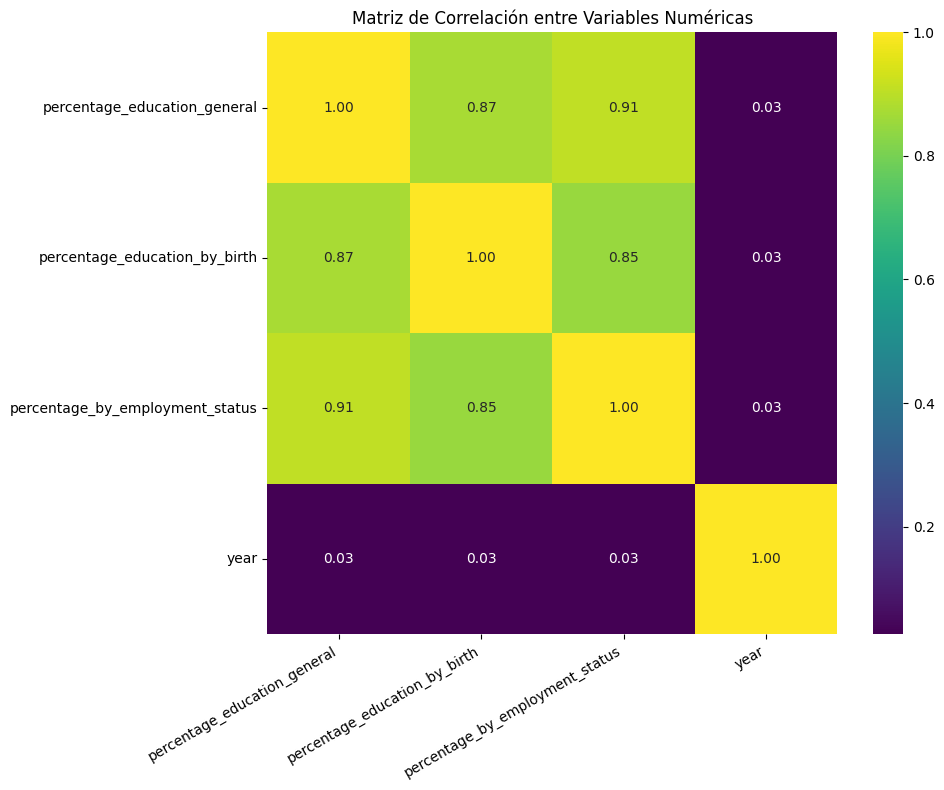

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame estratificado
stratified_df = pd.read_csv('data_sample_stratified_for_flourish.csv')

# Seleccionar solo las columnas numéricas
numeric_df = stratified_df[['percentage_education_general', 'percentage_education_by_birth', 'percentage_by_employment_status', 'year']]

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.xticks(rotation=30, ha='right') # Añadimos rotación de 30 grados
plt.tight_layout()
plt.show()